In [1]:
import pandas as pd

allData=pd.read_excel("variables.seleccionadas_21FEB.xlsx")

In [2]:
allData.columns

Index(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'Distrito', 'Zona', 'Latitud',
       'Longitud', 'cobertura.cell', 'Educ.sec.comp', 'esp.vid.nacer',
       'Ing.fam.p.cap', 'NBS.2017', 'No.Pobreza', 'Tasa.docen_pub'],
      dtype='object')

In [3]:
allData.columns=allData.columns.str.replace(".","_",regex=False)

In [4]:
losIDS=['DEPARTAMENTO','PROVINCIA','Distrito']
allData['DepaProvDis']=allData[losIDS].apply(lambda x: '+'.join(x), axis=1)

In [5]:
VarsToCluster=['cobertura_cell', 'Educ_sec_comp', 'esp_vid_nacer',
       'Ing_fam_p_cap', 'NBS_2017', 'No_Pobreza', 'Tasa_docen_pub']


<AxesSubplot:>

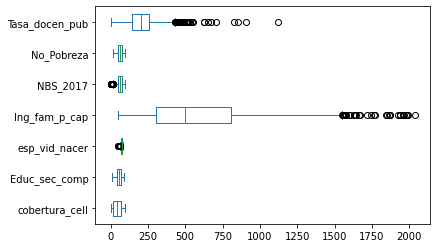

In [6]:
%matplotlib inline
allData.loc[:,VarsToCluster].plot(kind='box',vert=False)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df=allData.loc[:,VarsToCluster] 
 
DataCluster = scaler.fit_transform(df.to_numpy())
DataCluster = pd.DataFrame(DataCluster, columns=VarsToCluster)
 
DataCluster.head()

,cobertura_cell,Educ_sec_comp,esp_vid_nacer,Ing_fam_p_cap,NBS_2017,No_Pobreza,Tasa_docen_pub
0,1.379946,1.513183,-0.284524,1.836529,1.453801,1.485622,-0.097462
1,-1.123999,0.969052,-0.442923,-0.075842,-1.902808,-0.140700,-0.727126
2,-0.434601,-1.462557,-0.972784,-0.476059,0.043370,-0.685839,-0.219785
3,-1.283341,-0.226319,0.736041,-0.520874,0.617383,-0.297492,0.792162
4,-0.497219,-1.202028,-0.233362,-0.720138,-1.121057,-1.118536,-1.104975


<AxesSubplot:>

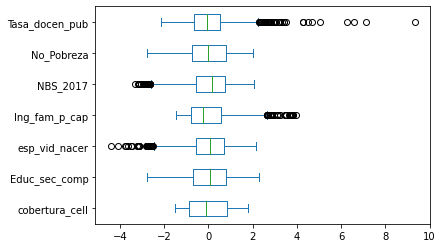

In [8]:
DataCluster.plot(kind='box',vert=False)

In [9]:
DataCluster.corr()

,cobertura_cell,Educ_sec_comp,esp_vid_nacer,Ing_fam_p_cap,NBS_2017,No_Pobreza,Tasa_docen_pub
cobertura_cell,1.000000,0.347376,0.254123,0.386898,0.482780,0.330313,-0.339003
Educ_sec_comp,0.347376,1.000000,0.135521,0.467195,0.429213,0.504242,-0.346948
esp_vid_nacer,0.254123,0.135521,1.000000,0.350430,0.195388,0.301227,-0.217157
Ing_fam_p_cap,0.386898,0.467195,0.350430,1.000000,0.350873,0.723773,-0.311530
NBS_2017,0.482780,0.429213,0.195388,0.350873,1.000000,0.297247,-0.249294
No_Pobreza,0.330313,0.504242,0.301227,0.723773,0.297247,1.000000,-0.250097
Tasa_docen_pub,-0.339003,-0.346948,-0.217157,-0.311530,-0.249294,-0.250097,1.000000


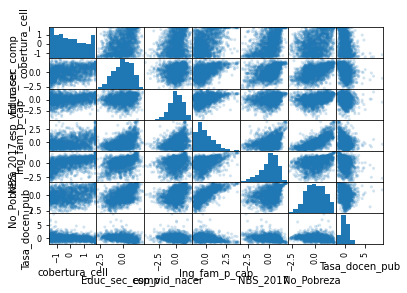

In [10]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(DataCluster, alpha=0.2)
plt.show()

In [11]:
DataCluster['Tasa_docen_pub']=-1*DataCluster['Tasa_docen_pub']

In [12]:
DataCluster.corr()

,cobertura_cell,Educ_sec_comp,esp_vid_nacer,Ing_fam_p_cap,NBS_2017,No_Pobreza,Tasa_docen_pub
cobertura_cell,1.000000,0.347376,0.254123,0.386898,0.482780,0.330313,0.339003
Educ_sec_comp,0.347376,1.000000,0.135521,0.467195,0.429213,0.504242,0.346948
esp_vid_nacer,0.254123,0.135521,1.000000,0.350430,0.195388,0.301227,0.217157
Ing_fam_p_cap,0.386898,0.467195,0.350430,1.000000,0.350873,0.723773,0.311530
NBS_2017,0.482780,0.429213,0.195388,0.350873,1.000000,0.297247,0.249294
No_Pobreza,0.330313,0.504242,0.301227,0.723773,0.297247,1.000000,0.250097
Tasa_docen_pub,0.339003,0.346948,0.217157,0.311530,0.249294,0.250097,1.000000


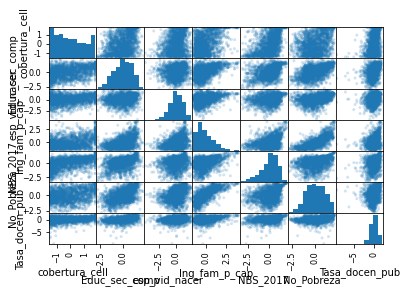

In [13]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(DataCluster, alpha=0.2)
plt.show()

In [14]:
DataCluster.columns=DataCluster.columns+'_std'

In [15]:
allData=pd.concat([allData,DataCluster],axis=1)

In [16]:
DataCluster2=allData.loc[:,VarsToCluster].apply(lambda x:pd.cut(x,10,labels=range(1,11)) )

In [17]:
DataCluster2

,cobertura_cell,Educ_sec_comp,esp_vid_nacer,Ing_fam_p_cap,NBS_2017,No_Pobreza,Tasa_docen_pub
0,9,9,7,7,9,9,2
1,2,8,7,3,3,6,2
2,4,3,6,2,7,5,2
3,1,6,8,2,8,6,3
4,4,4,7,2,5,4,1
...,...,...,...,...,...,...,...
1869,2,4,9,3,5,9,2
1870,1,4,9,3,5,9,3
1871,3,5,10,4,4,9,3
1872,8,4,10,4,5,9,2


In [18]:
DataCluster2.columns=DataCluster2.columns+"_decil"

In [19]:
DataCluster2

,cobertura_cell_decil,Educ_sec_comp_decil,esp_vid_nacer_decil,Ing_fam_p_cap_decil,NBS_2017_decil,No_Pobreza_decil,Tasa_docen_pub_decil
0,9,9,7,7,9,9,2
1,2,8,7,3,3,6,2
2,4,3,6,2,7,5,2
3,1,6,8,2,8,6,3
4,4,4,7,2,5,4,1
...,...,...,...,...,...,...,...
1869,2,4,9,3,5,9,2
1870,1,4,9,3,5,9,3
1871,3,5,10,4,4,9,3
1872,8,4,10,4,5,9,2


In [20]:
allData=pd.concat([allData,DataCluster2],axis=1)
allData

,UBIGEO,DEPARTAMENTO,PROVINCIA,Distrito,Zona,Latitud,Longitud,cobertura_cell,Educ_sec_comp,esp_vid_nacer,...,NBS_2017_std,No_Pobreza_std,Tasa_docen_pub_std,cobertura_cell_decil,Educ_sec_comp_decil,esp_vid_nacer_decil,Ing_fam_p_cap_decil,NBS_2017_decil,No_Pobreza_decil,Tasa_docen_pub_decil
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,X,-6.2294,-77.8714,87.500000,79.562705,72.192674,...,1.453801,1.485622,0.097462,9,9,7,7,9,9,2
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,X,-6.0317,-77.7122,11.111111,71.006832,71.364553,...,-1.902808,-0.140700,0.727126,2,8,7,3,3,6,2
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,X,-6.8375,-78.0214,32.142857,32.772384,68.594405,...,0.043370,-0.685839,0.219785,4,3,6,2,7,5,2
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,X,-6.2558,-77.7003,6.250000,52.210906,77.528252,...,0.617383,-0.297492,-0.792162,1,6,8,2,8,6,3
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,X,-6.0778,-77.7392,30.232558,36.868932,72.460151,...,-1.121057,-1.118536,1.104975,4,4,7,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,ZG,-8.8289,-75.2139,18.840580,40.104714,80.048647,...,-1.126523,1.256931,0.033209,2,4,9,3,5,9,2
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,ZG,-8.4353,-75.1597,10.000000,40.397763,79.565489,...,-1.011721,1.486810,-0.420204,1,4,9,3,5,9,3
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,X,-8.6392,-74.9644,20.689655,45.883427,82.510539,...,-1.208525,1.313303,-0.563366,3,5,10,4,4,9,3
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,X,-8.8264,-75.0522,78.571429,43.119697,83.853720,...,-0.896918,1.256931,0.753890,8,4,10,4,5,9,2


In [21]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   UBIGEO                1874 non-null   int64   
 1   DEPARTAMENTO          1874 non-null   object  
 2   PROVINCIA             1874 non-null   object  
 3   Distrito              1874 non-null   object  
 4   Zona                  1874 non-null   object  
 5   Latitud               1874 non-null   float64 
 6   Longitud              1874 non-null   float64 
 7   cobertura_cell        1874 non-null   float64 
 8   Educ_sec_comp         1874 non-null   float64 
 9   esp_vid_nacer         1874 non-null   float64 
 10  Ing_fam_p_cap         1874 non-null   float64 
 11  NBS_2017              1874 non-null   float64 
 12  No_Pobreza            1874 non-null   float64 
 13  Tasa_docen_pub        1874 non-null   float64 
 14  DepaProvDis           1874 non-null   object  
 15  cobe

In [22]:
allData.to_csv("allData.csv",index=False)